In [1]:
from PIL import Image
import glob
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input
from keras.utils import np_utils
from keras.layers import Add
from keras.layers import concatenate
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd
import itertools  
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time



# First Thermal model 

image_list = []

def my_load_Train_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Thermal Images/training/train/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Thermal Images/testing/test/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X1_train = my_load_Train_data_1()
X1_test = my_load_Test_data_1()
#print(len(X1_test))
y1_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Thermal Images/training/y_labels.csv')
y1_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Thermal Images/testing/y_test_labels.csv')
y1_test.values.reshape(-1,1)

n_classes = 8
X1_train = np.array(X1_train)
Y1_train = np.array(y1_train)
X1_test = np.array(X1_test)
Y1_test = np.array(y1_test)

Y1_train = np_utils.to_categorical(Y1_train, n_classes)
Y1_test = np_utils.to_categorical(Y1_test, n_classes)
# len(X1_train)
# print(Y1_test)
X1_train.shape
Y1_train.shape

#Secound Camera model

image_list = []

def my_load_Train_data_2() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Camera Images/training/train/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_2() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Camera Images/testing/test/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X2_train = my_load_Train_data_2()
X2_test = my_load_Test_data_2()
print(len(X2_test))
y2_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Camera Images/training/y_labels.csv')
y2_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Camera Images/testing/y_test_labels.csv')
y2_test.values.reshape(-1,1)

n_classes = 8
X2_train = np.array(X2_train)
Y2_train = np.array(y2_train)
X2_test = np.array(X2_test)
Y2_test = np.array(y2_test)

Y2_train = np_utils.to_categorical(Y2_train, n_classes)
Y2_test = np_utils.to_categorical(Y2_test, n_classes)


# Model 1(Thermal)

inp1 = Input(shape=(32, 32, 3))

# convolutional layer
conv1=Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp1)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=(Dense(25, activation='relu'))(flat1)
dense1=(Dense(10, activation='relu'))(hidd1)
output1=Flatten()(dense1)

#output= (Dense(10, activation='relu'))(model_1)

# Model 2

# convolutional layer
inp2 = Input(shape=(32, 32, 3))

# convolutional layer
conv1 =Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp2)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=Dense(25, activation='relu')(flat1)
dense2=Dense(10, activation='relu')(hidd1)
output2=Flatten()(dense2)

print(output1)
print(output2)

# concatinate two models 

concat1 = concatenate([output1, output2])
Out  = Dense(8, activation='softmax')(concat1)

model_concat = Model(inputs=[inp1, inp2], outputs = Out)

# compiling the sequential model
model_concat.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 




# training the model for 10 epochs
history= model_concat.fit([X1_train,X2_train],Y2_train, batch_size=128,epochs=15,validation_data=([X1_test,X2_test],Y2_test))




400
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='flatten_1/Reshape:0', description="created by layer 'flatten_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='flatten_3/Reshape:0', description="created by layer 'flatten_3'")
Epoch 1/15
16/16 [==============================] - 46s 3s/step - loss: 1.9890 - accuracy: 0.2616 - val_loss: 1.6776 - val_accuracy: 0.3900
Epoch 2/15
16/16 [==============================] - 44s 3s/step - loss: 1.5058 - accuracy: 0.4441 - val_loss: 1.3848 - val_accuracy: 0.4850
Epoch 3/15
16/16 [==============================] - 44s 3s/step - loss: 1.1966 - accuracy: 0.5845 - val_loss: 1.3665 - val_accuracy: 0.4650
Epoch 4/15
16/16 [==============================] - 44s 3s/step - loss: 1.0697 - accuracy: 0.6396 - val_loss: 1.1819 - val_accuracy: 0.5625
Epoch 5/15
16/16 [==============================] - 44s 3s/step - loss: 0.9214 - accuracy: 0.6794 - val_loss: 1.2480 - val_accurac

In [2]:
model_concat.save('Concat_Model')
#model.save_weights(top_model_weights_path)
start = datetime.datetime.now()
(eval_loss, eval_accuracy) = model_concat.evaluate([X1_test,X2_test],Y2_test, batch_size=128, verbose=1)
print('[INFO] Accuracy: {:.2f}%'.format(eval_accuracy * 100)) 
print('[INFO] Loss: {}'.format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

INFO:tensorflow:Assets written to: Concat_Model\assets
4/4 [==============================] - 2s 534ms/step - loss: 0.8765 - accuracy: 0.7450
[INFO] Accuracy: 74.50%
[INFO] Loss: 0.8764761090278625
Time:  0:00:02.438398


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


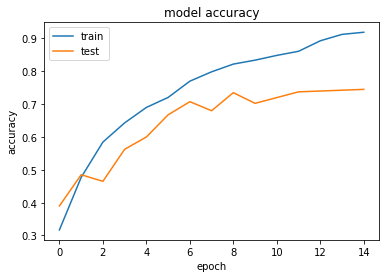

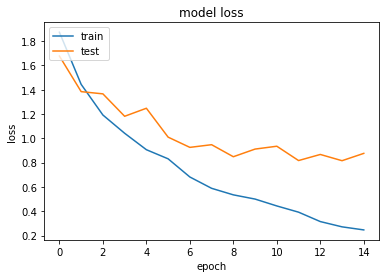

In [3]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()





In [4]:

# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

ListPic1 = ['thermal_bed254.jpg','thermal_bottle215.jpg','thermal_chair261.jpg','thermal_laptop258.jpg',
           'thermal_plate260.jpg','thermal_sofa283.jpg','thermal_spectacle261.jpg','thermal_table251.jpg']


ListPic2 = ['camera_bed253.jpg','camera_bottle248.jpg','camera_chair258.jpg','camera_laptop253.jpg',
            'camera_plate273.jpg','camera_sofa255.jpg','camera_spectacle279.jpg','camera_table252.jpg'] 


ListPic2[0]
for i in range(len(ListPic1)): 

 
    # load the image thermal
    img1 = load_img(ListPic1[i], target_size=(32, 32))
    # convert to array
    img1 = img_to_array(img1)
    # reshape into a single sample with 3 channels
    img1 = img1.reshape(1,32, 32, 3)
    # prepare pixel data
    img1 = img1.astype('float32')
    img1 = img1 / 255.0

 # for second Model
 # load the camera image
    
    img2 = load_img(ListPic2[i], target_size=(32, 32))
    # convert to array
    img2 = img_to_array(img2)
    # reshape into a single sample with 3 channels
    img2 = img2.reshape(1,32, 32, 3)
    # prepare pixel data
    img2 = img2.astype('float32')
    img2 = img2 / 255.0
    


    print('Fusion of ' +ListPic1[i]+ ' and ' +ListPic2[i]+ ' are: ')
    result = model_concat.predict([img1,img2])
    #print(result)
    #print(item1,item2)
 
   
    print("probality of Bed: ", result[0][0]*100)
    print()
    print("probality of Bottle: ", result[0][1]*100)
    print()
    print("probality of chair: ", result[0][2]*100)
    print()
    print("probality of Laptop: ", result[0][3]*100)
    print()
    print("probality of Plate: ", result[0][4]*100)
    print()
    print("probality of Sofa: ", result[0][5]*100)
    print()
    print("probality of Spectacle: ", result[0][6]*100)
    print()
    print("probality of Table: ", result[0][7]*100)
    print("__________________________________________________________________")


Fusion of thermal_bed254.jpg and camera_bed253.jpg are: 
probality of Bed:  45.1897531747818

probality of Bottle:  7.2538790618637e-05

probality of chair:  0.00010432127055537421

probality of Laptop:  0.00029616733172588283

probality of Plate:  0.010595438652671874

probality of Sofa:  54.79324460029602

probality of Spectacle:  0.005928902828600258

probality of Table:  3.849175200798527e-07
__________________________________________________________________
Fusion of thermal_bottle215.jpg and camera_bottle248.jpg are: 
probality of Bed:  4.696889632782586e-06

probality of Bottle:  99.934321641922

probality of chair:  0.0015277981219696812

probality of Laptop:  0.059299281565472484

probality of Plate:  0.0001488979819441738

probality of Sofa:  0.0023647433408768848

probality of Spectacle:  8.430123266123246e-07

probality of Table:  0.0023464326659450307
__________________________________________________________________
Fusion of thermal_chair261.jpg and camera_chair258.jpg a

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import itertools  


preds = np.round(model_concat.predict([X1_test,X2_test]),0)
#print('rounded test_labels', preds)


print('Classification Matrix')

fusion = ['Bed','Bottle','Chair','Laptop','Plates','Sofa','Spectacle', 'Table']
classification_metrics = metrics.classification_report(Y2_test, preds,target_names = fusion)
print(classification_metrics)

print('Confusion Matrix')

sign=[0,1,2,3,4,5,6,7]
cf_matrix = confusion_matrix(Y2_test.argmax(axis=1), preds.argmax(axis=1),sign)
print(cf_matrix)

Classification Matrix
              precision    recall  f1-score   support

         Bed       0.69      0.76      0.72        50
      Bottle       1.00      1.00      1.00        50
       Chair       0.76      0.68      0.72        50
      Laptop       0.73      0.54      0.62        50
      Plates       0.92      0.98      0.95        50
        Sofa       0.63      0.84      0.72        50
   Spectacle       0.72      0.36      0.48        50
       Table       0.89      0.66      0.76        50

   micro avg       0.79      0.73      0.76       400
   macro avg       0.79      0.73      0.75       400
weighted avg       0.79      0.73      0.75       400
 samples avg       0.73      0.73      0.73       400

Confusion Matrix
[[41  0  0  0  2  5  1  1]
 [ 0 50  0  0  0  0  0  0]
 [ 9  0 34  2  0  4  1  0]
 [ 8  0  5 27  1  6  3  0]
 [ 1  0  0  0 49  0  0  0]
 [ 7  0  0  0  1 42  0  0]
 [14  0  4  5  0  6 18  3]
 [ 6  0  2  3  0  4  2 33]]


C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Normalized confusion matrix


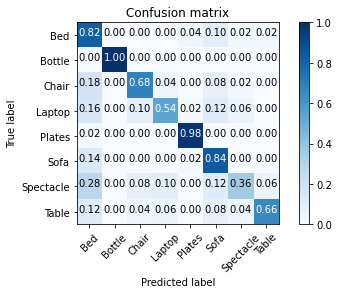

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix

categorical_test_labels = pd.DataFrame(Y2_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option
 #‘’’prints pretty confusion metric with normalization option ‘’’
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print('Normalized confusion matrix')
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
 
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
    
    
    
plot_confusion_matrix(confusion_matrix, fusion , normalize= True)   